In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, odeint
from const import *

0.05754026132188914


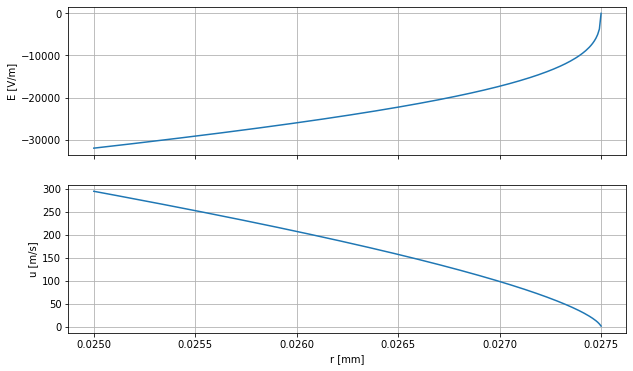

In [10]:
rp= 25e-6
J = 10
uB = 1
s = 0.1*25e-6

def cylindrical_sheath(s):
    R = rp + s
    r_list = np.linspace(R, rp, 300)
    def fun(y, r):
        return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]

    sol = odeint(fun, y0=[0, uB], t=r_list)
    V = simpson(sol[:, 0], r_list)
    return sol[:, 0], sol[:, 1], V, r_list

def child_law(s):
    V = (9/4/epsilon_0*J*s**2*np.sqrt(Mp/2/e))**(2/3)
    return V

E, u, V, r_list = cylindrical_sheath(s)

plt.subplots(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
plt.plot(r_list*1e3, E)
plt.ylabel('E [V/m]')
plt.xticks(visible=False)
plt.grid(True)

ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(r_list*1e3, u)
plt.ylabel('u [m/s]')
plt.xlabel('r [mm]')
plt.grid(True)
print(V)



In [17]:
rp

2.5e-05

In [27]:
10**(np.log10(rp)-1)/rp

0.09999999999999996

In [28]:
s_list = np.logspace(np.log10(rp)-3, np.log10(rp)+2, 10000)
#s_list = np.linspace(1e-4*rp, 1e3*rp, 10000)
V_list = []
V_child_list = []

for s in s_list:
    V_list.append(cylindrical_sheath(s)[2])
    V_child_list.append(child_law(s))

V_list = np.array(V_list)
V_child_list = np.array(V_child_list)

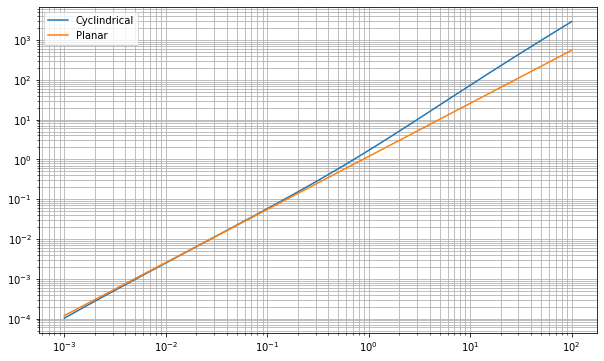

In [31]:
plt.figure(figsize=(10,6))
plt.plot((s_list)/rp, V_list)
plt.plot((s_list)/rp, V_child_list)

plt.legend(['Cyclindrical', 'Planar'])
plt.xscale('log')
plt.yscale('log')
plt.xticks()
#plt.xlim(1e-2,1e1)
#plt.ylim(1e-2,1e2)
plt.grid(True, 'both')

In [30]:
s_list/rp

array([1.00000000e-03, 1.00115207e-03, 1.00230547e-03, ...,
       9.97699834e+01, 9.98849255e+01, 1.00000000e+02])